<font size = 5> NBA Data Science and Analysis</font>
<p>The ideia of this work is to <strong> scrape </strong> the NBA All Time Data, then find the list of players nominated for the Hall of Fame, build a <strong> Machine Learning Model </strong> to predict weather or not the active players will be nominated for the Hall of Fame.</p>
<p>To finish this work, there is a <strong> Data Analysis </strong> part where we see whats diferentiates a 'normal player' to a 'hall of famer'.</p>
 

<font size = 4><strong> 1. Web Scrapping </strong></font>

In [153]:
import pandas as pd
import numpy as np
import requests
pd.set_option('display.max_columns',None)
url = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=No&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory=PTS'

In [154]:
headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

In [155]:
r = requests.get(url,headers = headers).json()

In [156]:
table_headers = r['resultSet']['headers']

In [157]:
table = r['resultSet']['rowSet']

In [158]:
df_allTime = pd.DataFrame(table, columns = table_headers)
df_allTime

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
1          2544         LeBron James  1409  53707.0  14040  27809   0.505   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
...         ...                  ...   ...      ...    ...    ...     ...   
4778     204033           David Wear     2      7.0      0      2   0.000   
4779     203091          Royce White     3      9.0      0      1   0.000   
4780     204222     Greg Whittington     4     12.0      0      3   0.000   
4781    1631214     Alondes Williams     1      5.0      0      0   0.000   
4782       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
1     2233.0  6488.0    0.344  8039  10939   0.735  1652.0   8924.0  10576.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4778     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4779     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4780     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4781     0.0     0.0    0.000     0      0   0.000     0.0      1.0      1.0   
4782     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0      5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
1     10351  2176.0  1065.0  4922.0  2585  38352    2.103    0.442    0.545   
2      5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3      6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4      5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4778      1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4779      0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4780      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4781      0     0.0     0.0     2.0     1      0    0.000    0.000    0.000   
4782      0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.592        2         1         1         1          168       2318   
1      0.588       10         3         2         2          490          9   
2      0.577        6         2         3         3          377        991   
3      0.550       15         8         6         4         1669         22   
4      0.569       98        29         5         5          644        330   
...      ...      ...       ...       ...       ...          ...        ...   
4778   0.000     4624      4344      4663      4671         4663       2575   
4779   0.000     4559      4320      4663      4704         4663       2575   
4780   0.000     4479      4275      4663      4620         4663       2575   
4781   0.000     4707      4370      4663      4751         4663       2575   
4782   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0          2049          2552        12         8         2252         32   
1             4           835         4         5         2069      

In [159]:
url2 = 'https://stats.nba.com/stats/leagueLeaders?ActiveFlag=Yes&LeagueID=00&PerMode=Totals&Scope=S&Season=All%20Time&SeasonType=Regular%20Season&StatCategory=PTS'
r2 = requests.get(url2, headers = headers).json()
table_head2 = r2['resultSet']['headers']
table2 = r2['resultSet']['rowSet']

df_active = pd.DataFrame(table2, columns = table_head2)
mask = df_allTime['PLAYER_NAME'].isin(df_active['PLAYER_NAME'])
df_active = df_allTime[mask]
df_active

PLAYER_ID        PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
1          2544       LeBron James  1409  53707.0  14040  27809   0.505   
13       201142       Kevin Durant   978  35912.0   9126  18311   0.498   
26       201935       James Harden   978  33929.0   7150  16166   0.442   
27       201566  Russell Westbrook  1072  36888.0   8616  19715   0.437   
37       101108         Chris Paul  1189  40977.0   7559  16004   0.472   
...         ...                ...   ...      ...    ...    ...     ...   
4722    1629788         Tyler Hall     1      2.0      0      0   0.000   
4727    1630643           Jay Huff     4     20.0      0      3   0.000   
4728    1630624         Feron Hunt     2      8.0      0      2   0.000   
4735    1631211       Trevor Keels     1      1.0      0      1   0.000   
4781    1631214   Alondes Williams     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB    DREB      REB  \
1     2233.0  6488.0    0.344  8039  10939   0.735  1652.0  8924.0  10576.0   
13    1841.0  4800.0    0.384  6591   7439   0.886   673.0  6235.0   6908.0   
26    2694.0  7436.0    0.362  7239   8423   0.859   762.0  4762.0   5524.0   
27    1201.0  3952.0    0.304  5665   7270   0.779  1749.0  6109.0   7858.0   
37    1602.0  4336.0    0.369  4684   5382   0.870   727.0  4627.0   5354.0   
...      ...     ...      ...   ...    ...     ...     ...     ...      ...   
4722     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4727     0.0     2.0    0.000     0      0   0.000     1.0     3.0      4.0   
4728     0.0     0.0    0.000     0      0   0.000     1.0     0.0      1.0   
4735     0.0     1.0    0.000     0      0   0.000     0.0     1.0      1.0   
4781     0.0     0.0    0.000     0      0   0.000     0.0     1.0      1.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
1     10351  2176.0  1065.0  4922.0  2585  38352    2.103    0.442    0.545   
13     4239  1053.0  1095.0  3100.0  1893  26684    1.367    0.340    0.549   
26     6790  1492.0   531.0  3665.0  2533  24233    1.853    0.407    0.526   
27     8994  1750.0   335.0  4366.0  2806  24098    2.060    0.401    0.467   
37    11271  2499.0   186.0  2843.0  2880  21404    3.964    0.879    0.522   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4722      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4727      1     1.0     1.0     1.0     1      0    1.000    1.000    0.000   
4728      1     1.0     0.0     1.0     1      0    1.000    1.000    0.000   
4735      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4781      0     0.0     0.0     2.0     1      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
1      0.588       10         3         2         2          490          9   
13     0.618      167        67        22        29          625         20   
26     0.610      167        94        70        46         1813          3   
27     0.526       98        58        27        19         1986         90   
37     0.583       49        31        50        49         1031         34   
...      ...      ...       ...       ...       ...          ...        ...   
4722   0.000     4707      4413      4663      4751         4663       2575   
4727   0.000     4479      4201      4663      4620         4663       2575   
4728   0.000     4624      4335      4663      4671         4663       2575   
4735   0.000     4707      4424      4663      4704         4663       2575   
4781   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
1             4           835         4         5         2069        175   
13           23           299        14        27          195        636   
26            2           5

In [160]:
mask1 = ~df_allTime['PLAYER_NAME'].isin(df_active['PLAYER_NAME'])
df_retired = df_allTime[mask1]
df_retired

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4777      78470      Stan Washington     1      4.0      0      1   0.000   
4778     204033           David Wear     2      7.0      0      2   0.000   
4779     203091          Royce White     3      9.0      0      1   0.000   
4780     204222     Greg Whittington     4     12.0      0      3   0.000   
4782       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4777     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4778     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4779     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4780     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4782     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4777     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4778     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4779     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4780     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4782     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.592        2         1         1         1          168       2318   
2      0.577        6         2         3         3          377        991   
3      0.550       15         8         6         4         1669         22   
4      0.569       98        29         5         5          644        330   
5      0.577        4         4         8         8         1072         15   
...      ...      ...       ...       ...       ...          ...        ...   
4777   0.000     4707      4384      4663      4704         4663       3500   
4778   0.000     4624      4344      4663      4671         4663       2575   
4779   0.000     4559      4320      4663      4704         4663       2575   
4780   0.000     4479      4275      4663      4620         4663       2575   
4782   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0          2049          2552        12         8         2252         32   
2           948          1680         1         1         1938         13   
3  

In [161]:
from bs4 import BeautifulSoup

url_HOF = 'https://www.nba.com/news/basketball-hall-of-fame-all-time'
html_text = requests.get(url_HOF).text
soup = BeautifulSoup(html_text,'lxml')
num_articles = 6
table = soup.find_all('li' , class_ = None)[:-num_articles]
nominees = []
motives = []
for i in range(len(table)):
    nominee , motive = table[i].text.replace('\xa0','').replace(', ',',').split(',')
    nominees.append(nominee)
    motives.append(motive)

dict_HOF = {'Nominees' : nominees,
            'Motive' : motives}

df_HOF = pd.DataFrame(dict_HOF) 
df_HOF

Nominees       Motive
0         Rick Adelman        Coach
1           Chris Bosh       Player
2          Paul Pierce       Player
3         Bill Russell        Coach
4          Ben Wallace       Player
..                 ...          ...
423     James Naismith  Contributor
424       Harold Olsen  Contributor
425      John Schommer       Player
426  Amos Alonzo Stagg  Contributor
427       Oswald Tower  Contributor

[428 rows x 2 columns]

<font size = 3>Having the data about the <strong>Hall of Famers</strong>, we can add this to our dataframe, and add three other columns, <strong>Points per Game</strong>, <strong>Assists per Game</strong> and <strong>Rebounds per Game</strong>. </font>

In [162]:
df_retired.loc[:,'PPG'] = round(df_retired.loc[:,'PTS']/df_retired.loc[:,'GP'],2)
df_retired.loc[:,'APG'] = round(df_retired.loc[:,'AST']/df_retired.loc[:,'GP'],2)
df_retired.loc[:,'RPG'] = round(df_retired.loc[:,'REB']/df_retired.loc[:,'GP'],2)

df_retired['HOF'] = df_retired['PLAYER_NAME'].isin(df_HOF['Nominees'])
dict_yesNo = {True : 'Yes' , False : 'No'}

df_retired['HOF'] = df_retired['HOF'].apply(lambda x:dict_yesNo[x])

df_retired

C:\Users\lucas\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\lucas\AppData\Local\Temp/ipykernel_5472/1562612494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired['HOF'] = df_retired['PLAYER_NAME'].isin(df_HOF['Nominees'])
C:\Users\lucas\AppData\Local\Temp/ipykernel_5472/1562612494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4777      78470      Stan Washington     1      4.0      0      1   0.000   
4778     204033           David Wear     2      7.0      0      2   0.000   
4779     203091          Royce White     3      9.0      0      1   0.000   
4780     204222     Greg Whittington     4     12.0      0      3   0.000   
4782       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4777     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4778     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4779     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4780     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4782     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4777     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4778     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4779     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4780     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4782     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.592        2         1         1         1          168       2318   
2      0.577        6         2         3         3          377        991   
3      0.550       15         8         6         4         1669         22   
4      0.569       98        29         5         5          644        330   
5      0.577        4         4         8         8         1072         15   
...      ...      ...       ...       ...       ...          ...        ...   
4777   0.000     4707      4384      4663      4704         4663       3500   
4778   0.000     4624      4344      4663      4671         4663       2575   
4779   0.000     4559      4320      4663      4704         4663       2575   
4780   0.000     4479      4275      4663      4620         4663       2575   
4782   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0          2049          2552        12         8         2252         32   
2           948          1680         1         1         1938         13   
3  

<p></p>
<font size = 4><strong>2. Building a Machine Learning Model</strong></font>
<p></p>

<p></p>
<font size = 2><strong>2.1 Data Cleaning</strong></font>
<p></p>

In [163]:
to_duplicate = df_retired.loc[df_retired['HOF'] == 'Yes']
i = 0
while i <= 4:
    df_retired_ = pd.concat([df_retired,to_duplicate])
    i += 1
df_retired_
df_train = df_retired.drop(columns = ['GP_RANK','MIN_RANK','FGM_RANK','FGA_RANK','FG_PCT_RANK','FG3M_RANK',
                                      'FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
                                      'DREB_RANK','REB_RANK','AST_RANK','STL_RANK','BLK_RANK','TOV_RANK','PF_RANK',
                                      'PTS_RANK','AST_TOV_RANK','STL_TOV_RANK','EFG_PCT1','TS_PCT1',])

In [164]:
#Author: Dennis Trimarchi
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [165]:
# importando bibliotecas de visualização e de machine learning

import seaborn as sns
import matplotlib.pyplot as plt
df_train

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
2           252          Karl Malone  1476  54852.0  13528  26210   0.516   
3           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
4           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
5          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4777      78470      Stan Washington     1      4.0      0      1   0.000   
4778     204033           David Wear     2      7.0      0      2   0.000   
4779     203091          Royce White     3      9.0      0      1   0.000   
4780     204222     Greg Whittington     4     12.0      0      3   0.000   
4782       1868        Trevor Winter     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
2       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
3     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
4      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
5     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4777     NaN     NaN      NaN     0      0   0.000     0.0      0.0      0.0   
4778     0.0     1.0    0.000     0      0   0.000     2.0      0.0      2.0   
4779     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4780     0.0     2.0    0.000     0      0   0.000     0.0      0.0      0.0   
4782     0.0     0.0    0.000     0      0   0.000     1.0      2.0      3.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
2     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
3     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
4     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
5     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4777     0     0.0     0.0     NaN     1      0      NaN      NaN    0.000   
4778     1     0.0     0.0     0.0     1      0    0.000    0.000    0.000   
4779     0     0.0     0.0     0.0     2      0    0.000    0.000    0.000   
4780     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4782     0     0.0     0.0     0.0     5      0    0.000    0.000    0.000   

      TS_PCT    PPG   APG    RPG  HOF  
0      0.592  24.61  3.63  11.18  Yes  
2      0.577  25.02  3.56  10.14  Yes  
3      0.550  24.99  4.68   5.24  Yes  
4      0.569  30.12  5.25   6.22  Yes  
5      0.577  20.74  2.40   7.55   No  
...      ...    ...   ...    ...  ...  
4777   0.000   0.00  0.00   0.00   No  
4778   0.000   0.00  0.50   1.00   No  
4779   0.000   0.00  0.00   0.00   No  
4780   0.000   0.00  0.00   0.00   No  
4782   0.000   0.00  0.00   3.00   No  

[4216 rows x 30 columns]

In [166]:
x = df_train.iloc[:,2:-1]
y = df_train.iloc[:,-1]
x

GP      MIN    FGM    FGA  FG_PCT    FG3M    FG3A  FG3_PCT   FTM  \
0     1560  57446.0  15837  28307   0.559     1.0    18.0    0.056  6712   
2     1476  54852.0  13528  26210   0.516    85.0   310.0    0.274  9787   
3     1346  48643.0  11719  26200   0.447  1827.0  5546.0    0.329  8378   
4     1072  41010.0  12192  24537   0.497   581.0  1778.0    0.327  7327   
5     1522  51367.0  11169  23734   0.471  1982.0  5210.0    0.380  7240   
...    ...      ...    ...    ...     ...     ...     ...      ...   ...   
4777     1      4.0      0      1   0.000     NaN     NaN      NaN     0   
4778     2      7.0      0      2   0.000     0.0     1.0    0.000     0   
4779     3      9.0      0      1   0.000     0.0     0.0    0.000     0   
4780     4     12.0      0      3   0.000     0.0     2.0    0.000     0   
4782     1      5.0      0      0   0.000     0.0     0.0    0.000     0   

        FTA  FT_PCT    OREB     DREB      REB   AST     STL     BLK     TOV  \
0      9304   0.721  2975.0   9394.0  17440.0  5660  1160.0  3189.0  2527.0   
2     13188   0.742  3562.0  11406.0  14968.0  5248  2085.0  1145.0  4524.0   
3     10011   0.837  1499.0   5548.0   7047.0  6306  1944.0   640.0  4010.0   
4      8772   0.835  1668.0   5004.0   6672.0  5633  2514.0   893.0  2924.0   
5      8239   0.879  1468.0  10021.0  11489.0  3651  1210.0  1281.0  2494.0   
...     ...     ...     ...      ...      ...   ...     ...     ...     ...   
4777      0   0.000     0.0      0.0      0.0     0     0.0     0.0     NaN   
4778      0   0.000     2.0      0.0      2.0     1     0.0     0.0     0.0   
4779      0   0.000     0.0      0.0      0.0     0     0.0     0.0     0.0   
4780      0   0.000     0.0      0.0      0.0     0     0.0     0.0     0.0   
4782      0   0.000     1.0      2.0      3.0     0     0.0     0.0     0.0   

        PF    PTS  AST_TOV  STL_TOV  EFG_PCT  TS_PCT    PPG   APG    RPG  
0     4657  38387    1.156    0.302    0.559   0.592  24.61  3.63  11.18  
2     4578  36928    1.160    0.461    0.518   0.577  25.02  3.56  10.14  
3     3353  33643    1.573    0.485    0.482   0.550  24.99  4.68   5.24  
4     2783  32292    1.926    0.860    0.509   0.569  30.12  5.25   6.22  
5     3601  31560    1.464    0.485    0.512   0.577  20.74  2.40   7.55  
...    ...    ...      ...      ...      ...     ...    ...   ...    ...  
4777     1      0      NaN      NaN    0.000   0.000   0.00  0.00   0.00  
4778     1      0    0.000    0.000    0.000   0.000   0.00  0.50   1.00  
4779     2      0    0.000    0.000    0.000   0.000   0.00  0.00   0.00  
4780     0      0    0.000    0.000    0.000   0.000   0.00  0.00   0.00  
4782     5      0    0.000    0.000    0.000   0.000   0.00  0.00   3.00  

[4216 rows x 27 columns]

<AxesSubplot:>

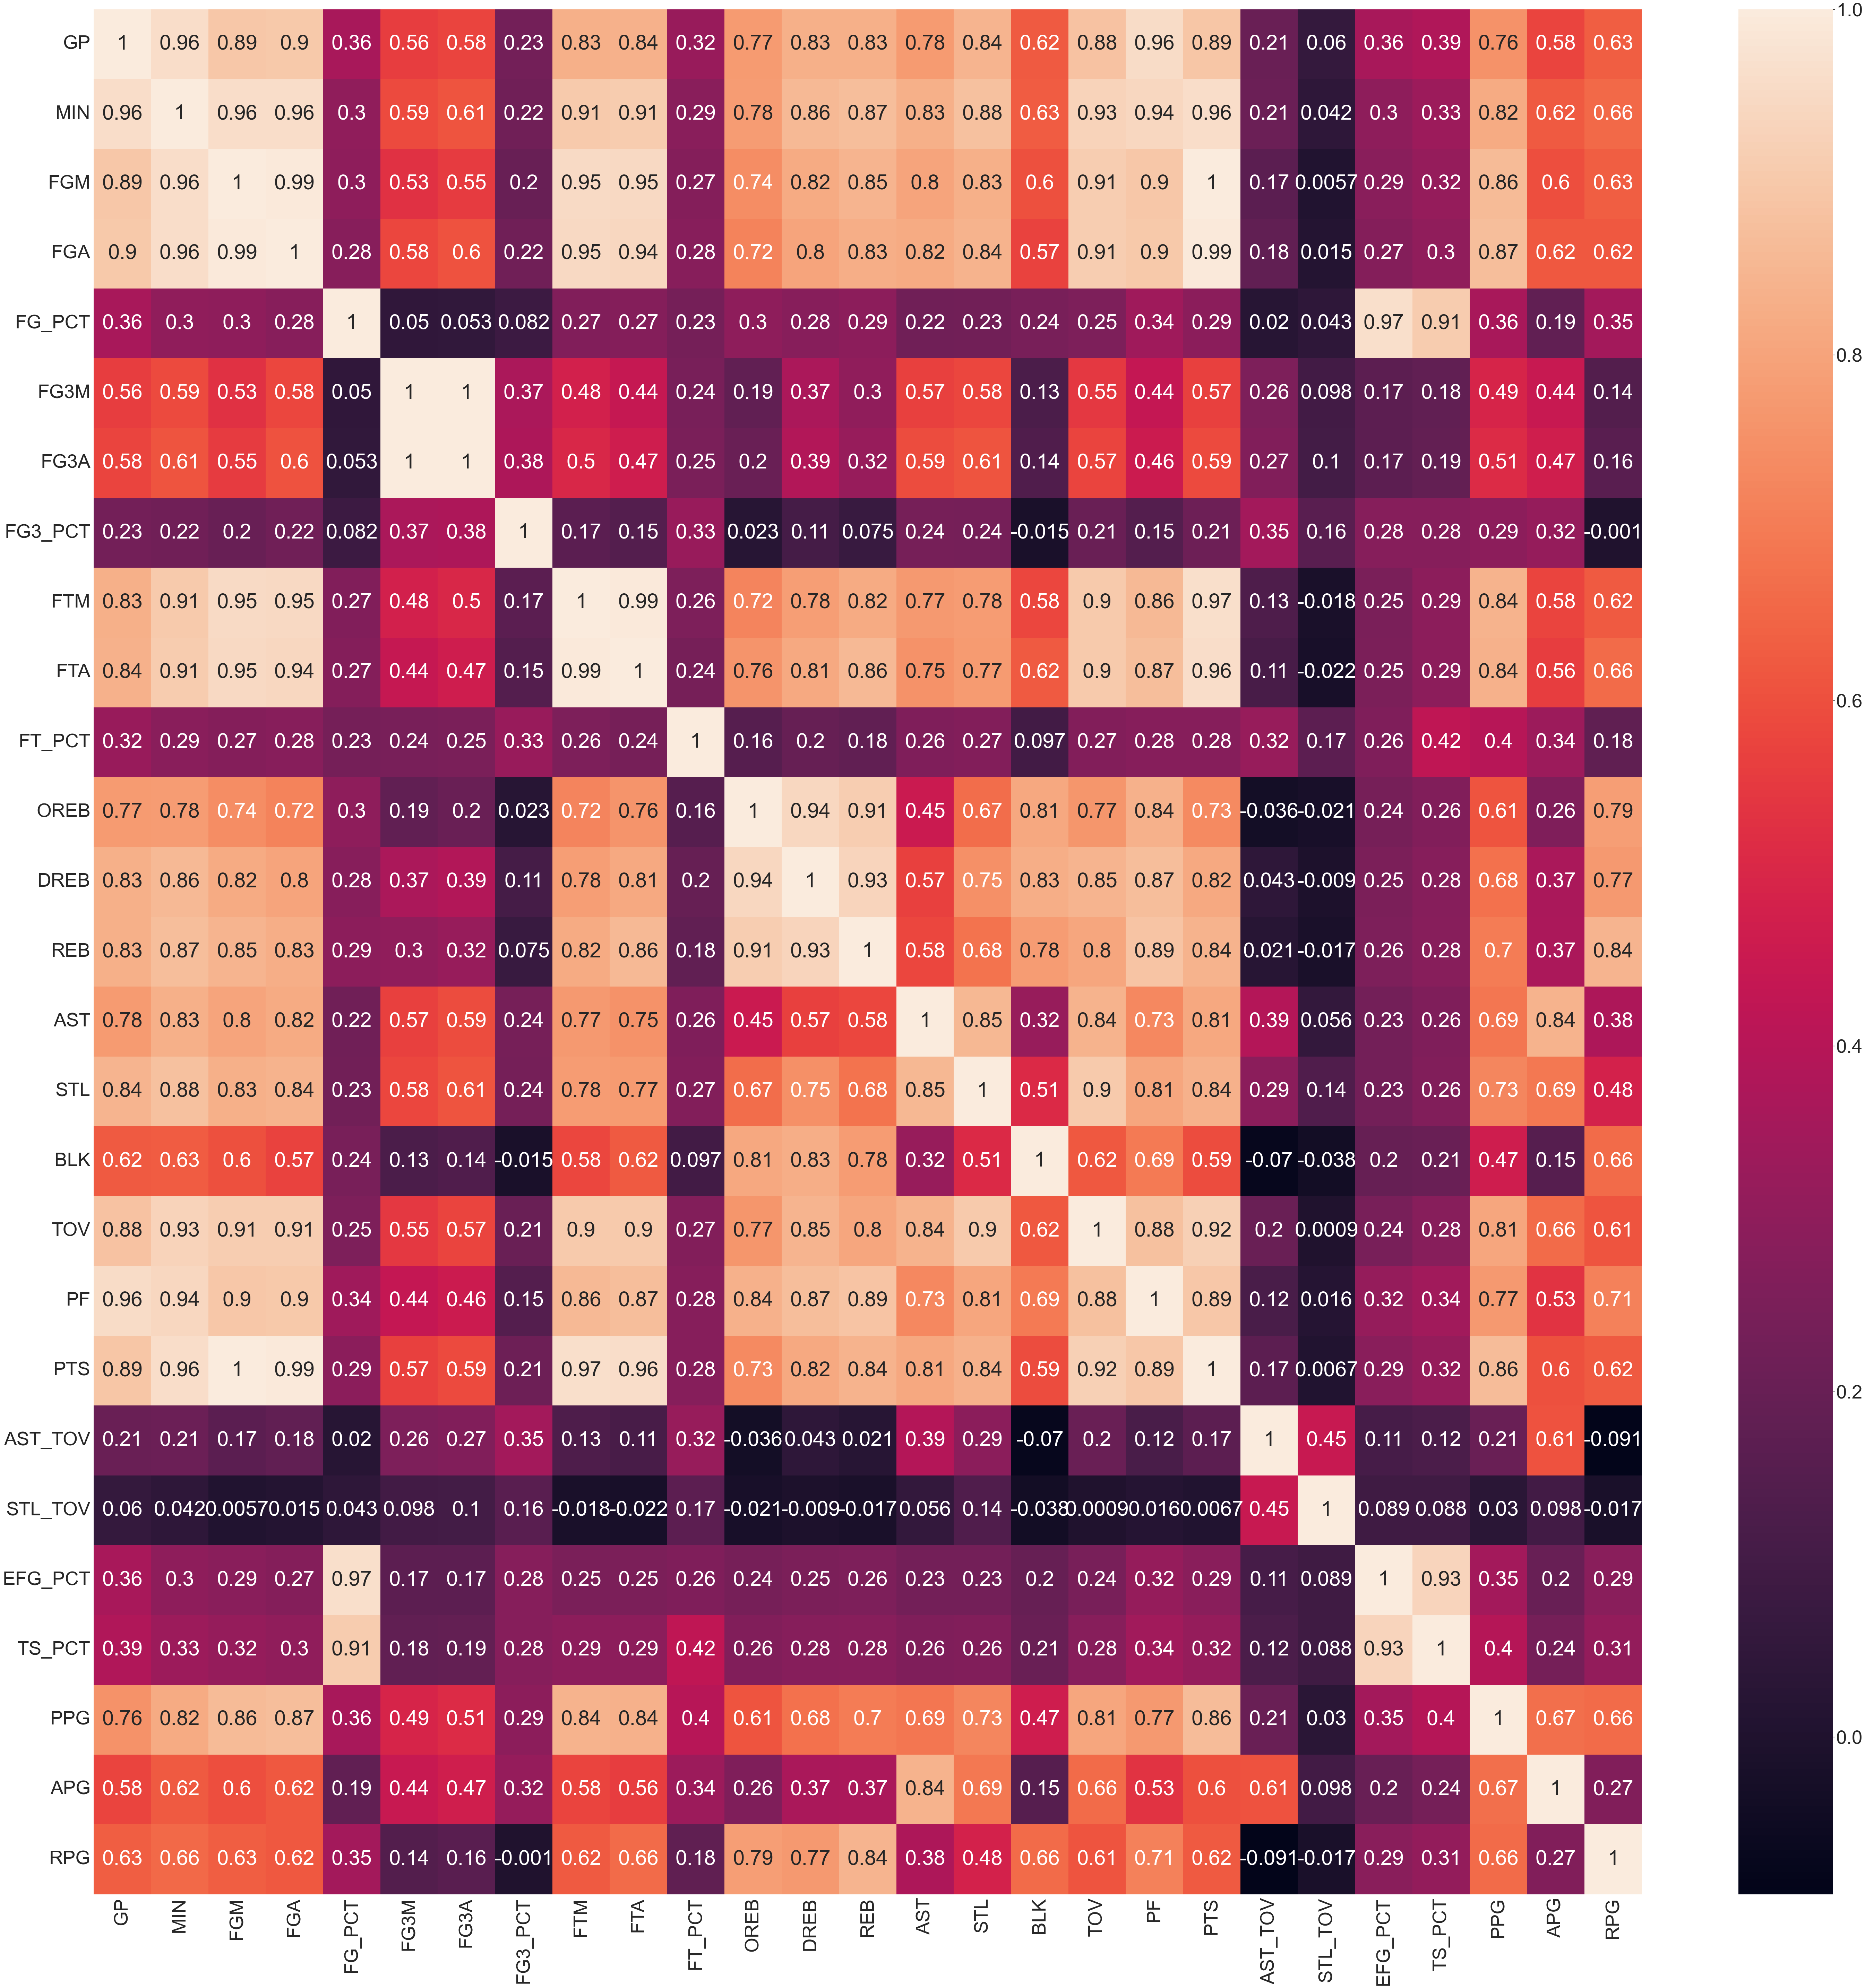

In [167]:
sns.set(font_scale = 5)
fig, ax = plt.subplots(figsize = (100,100))
sns.heatmap(x.corr(),annot=True)

<font size = 3> Removing correlated columns </font>

<AxesSubplot:>

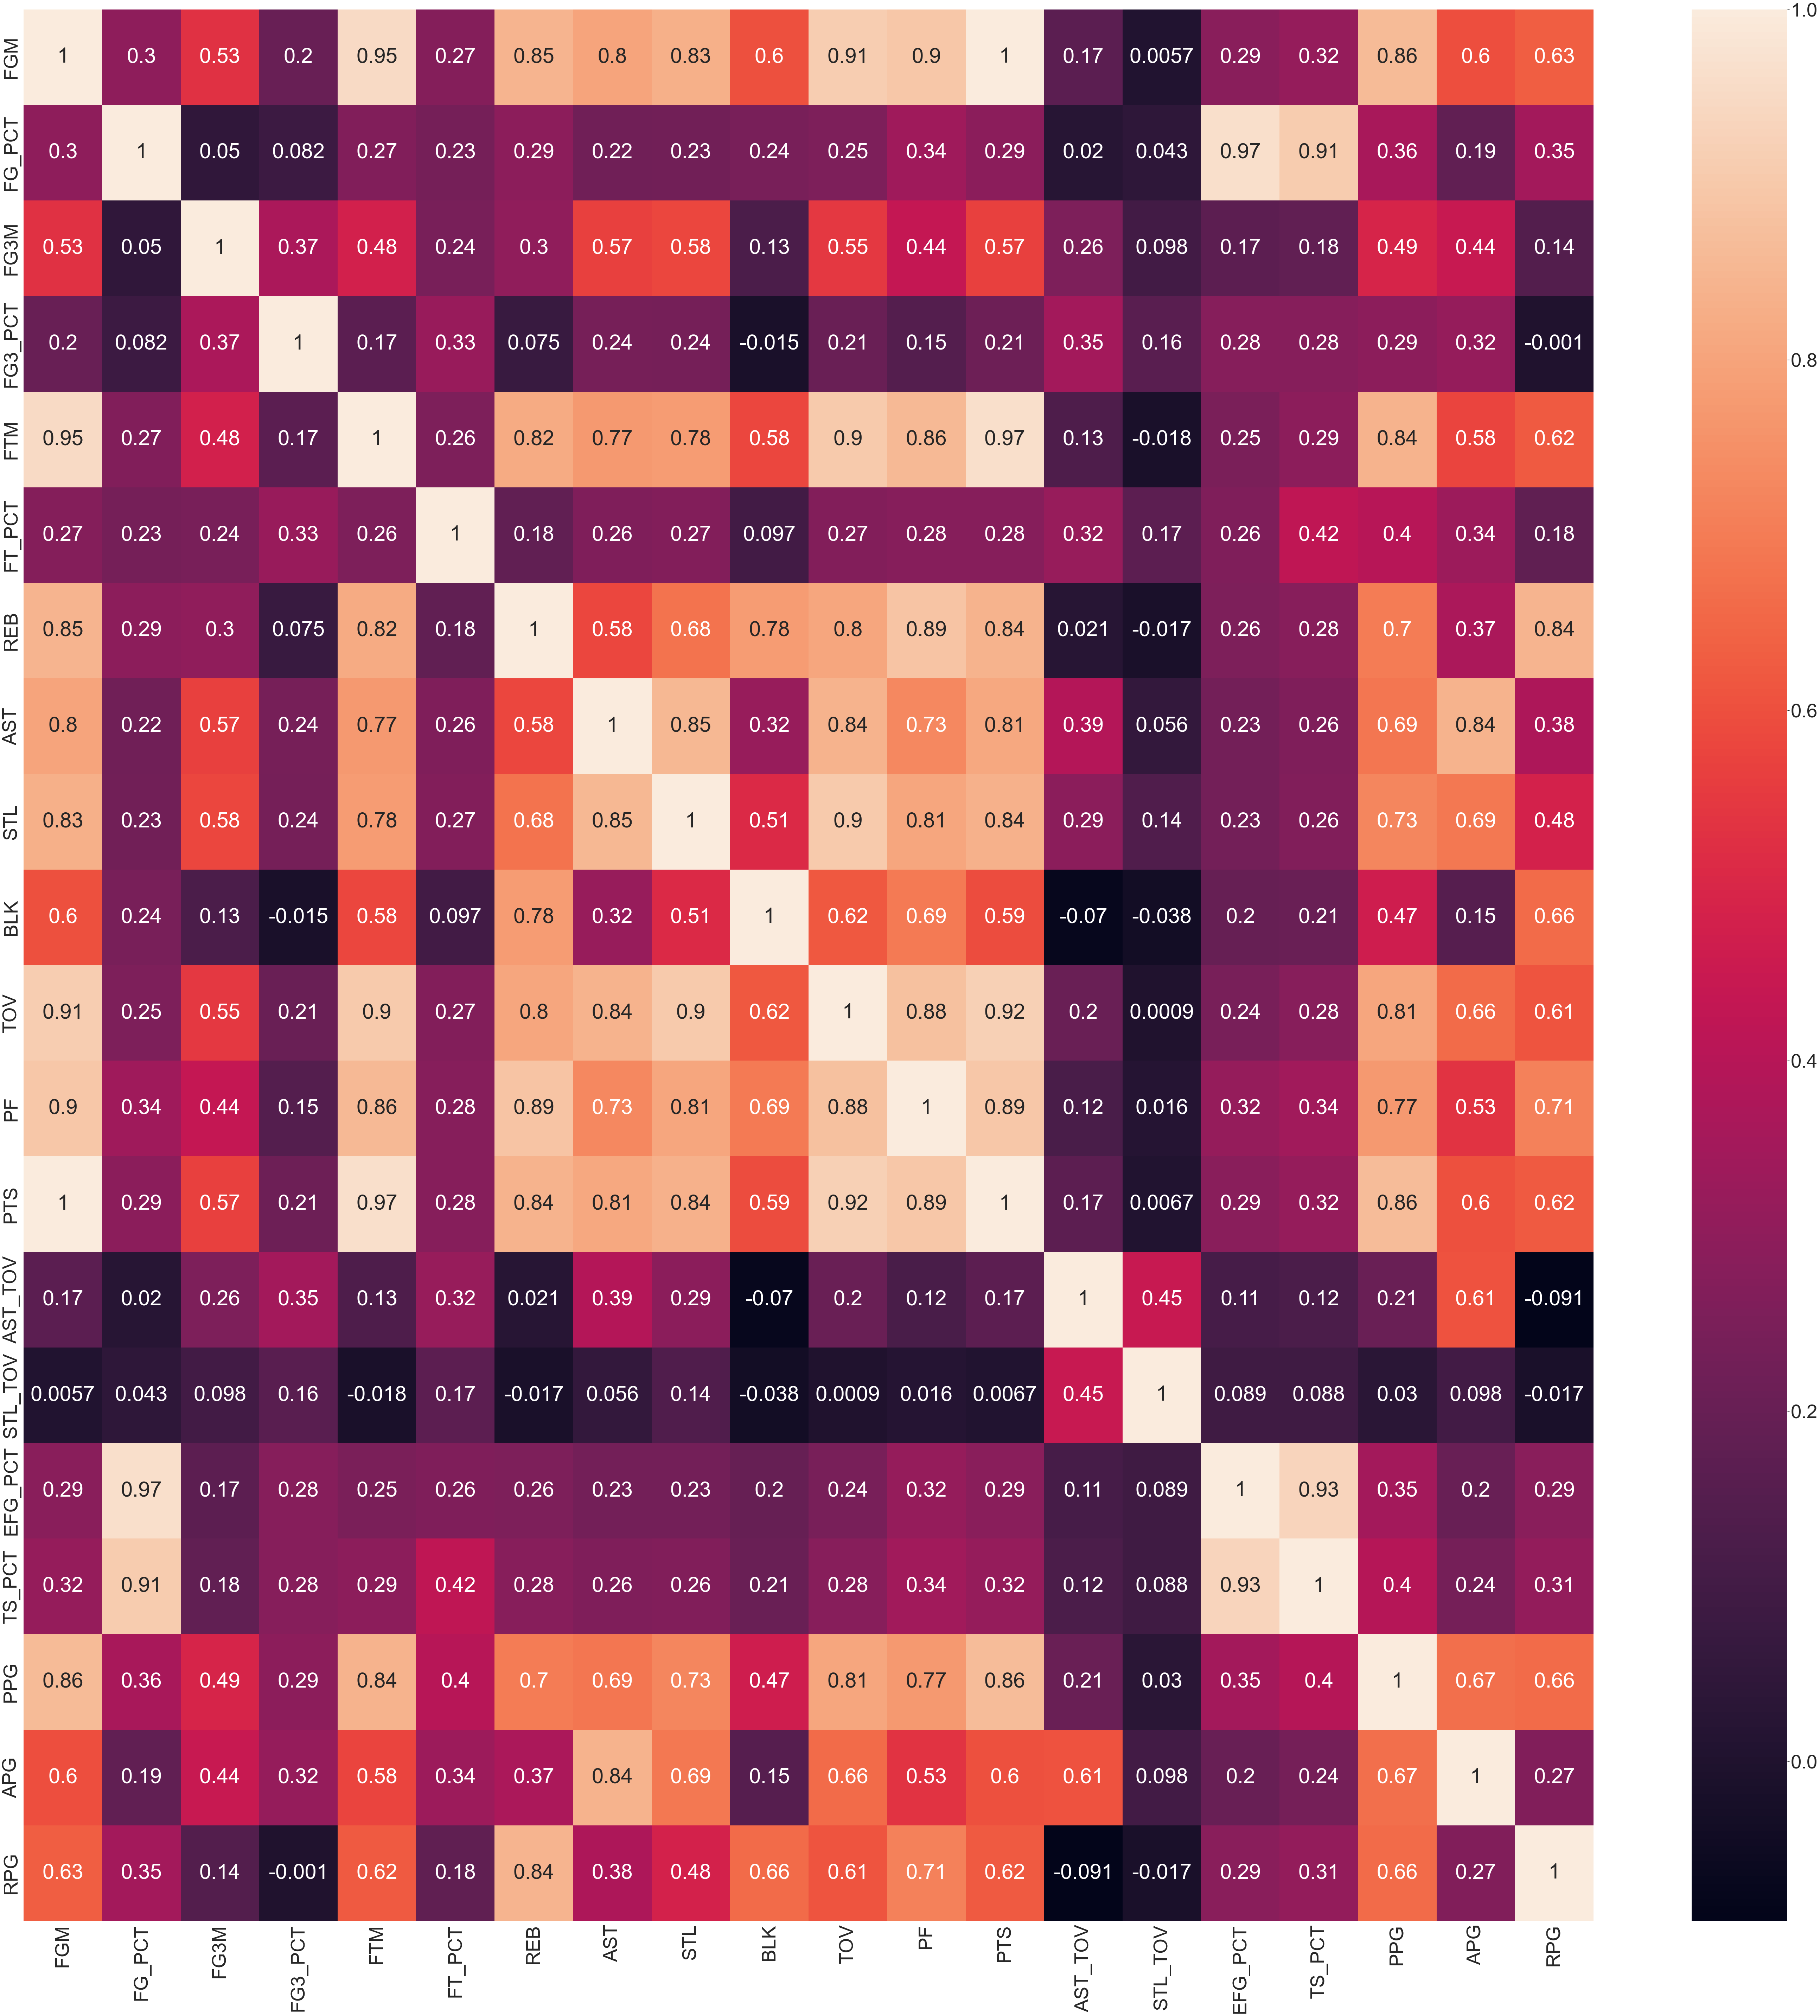

In [168]:
x = x.drop(columns = ['GP','MIN','FGA','FG3A','FTA','OREB','DREB'])
fig, ax = plt.subplots(figsize = (100,100))
sns.heatmap(x.corr(),annot=True)

In [169]:
num_vars = [i for i in x.columns if x.dtypes[i] == 'int64' or x.dtypes[i] == 'float64']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 3945 to 3255
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FGM      3372 non-null   int64  
 1   FG_PCT   3372 non-null   float64
 2   FG3M     2345 non-null   float64
 3   FG3_PCT  2345 non-null   float64
 4   FTM      3372 non-null   int64  
 5   FT_PCT   3372 non-null   float64
 6   REB      3194 non-null   float64
 7   AST      3372 non-null   int64  
 8   STL      2580 non-null   float64
 9   BLK      2580 non-null   float64
 10  TOV      2417 non-null   float64
 11  PF       3372 non-null   int64  
 12  PTS      3372 non-null   int64  
 13  AST_TOV  2417 non-null   float64
 14  STL_TOV  2417 non-null   float64
 15  EFG_PCT  3372 non-null   float64
 16  TS_PCT   3372 non-null   float64
 17  PPG      3372 non-null   float64
 18  APG      3372 non-null   float64
 19  RPG      3194 non-null   float64
dtypes: float64(15), int64(5)
memory usage: 553.2 KB


<p></p>
<font size = 3> Creating a <strong>Pipeline</strong> to avoid repeating code</font>
<p></p>

In [170]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [171]:
trans = Pipeline(steps = [('imputer' , SimpleImputer()),
                             ('scaler' , StandardScaler())])
prep = ColumnTransformer(transformers = [('num', trans, num_vars)])

<p></p>
<font size = 2><strong> 2.2 Selecting the Best Model</strong></font>
<p></p>

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

dist_Param_rf = dict()
dist_Param_rf['n_estimators'] = [10,50,100,200]
dist_Param_rf['criterion'] = ['gini', 'entropy', 'log_loss']


rf_random_search = RandomizedSearchCV(rf_model,dist_Param_rf)

model_rf = Pipeline(steps = [('preprocessor', prep),
                            ('model', rf_random_search)])

In [173]:
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
model_rf['model'].best_params_
model_rf['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.97478932        nan        nan 0.97567953        nan 0.97389955
        nan 0.97567865 0.97449302 0.97271217]
  warnings.warn(


0.9756795252225519

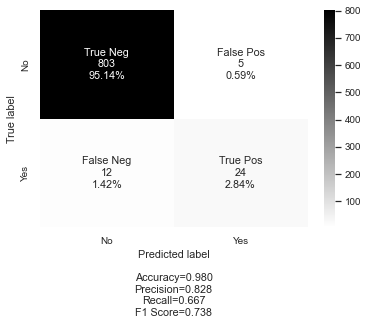

In [174]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale = 0.9)

cf_matrix = confusion_matrix(y_test, y_pred, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [175]:
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, accuracy_score

dict_trans_income = {'No' : 0 , 'Yes' : 1}
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred).apply(lambda x : dict_trans_income[x])
df_dict_rf = {'Modelo' : ['Random Forest'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_rf = pd.DataFrame(data = df_dict_rf)
df_rf

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Random Forest  0.979858   0.827586  0.666667  0.738462  0.830239

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier()

params_GBC = {'loss' : ['log_loss','exponential'],
              'n_estimators' : [100,200,300],
             'criterion' : ['friedman_mse' , 'squared_error']}


GBC_random_search = RandomizedSearchCV(GBC_model,params_GBC)

model_GBC = Pipeline(steps = [('preprocessor', prep),
                            ('model', GBC_random_search)])

In [177]:
model_GBC.fit(x_train,y_train)
y_pred1 = model_GBC.predict(x_test)
model_GBC['model'].best_params_
model_GBC['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for 

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\lucas\anaconda3\lib\site

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\lucas\anaconda3\lib\site

0.9744925816023737

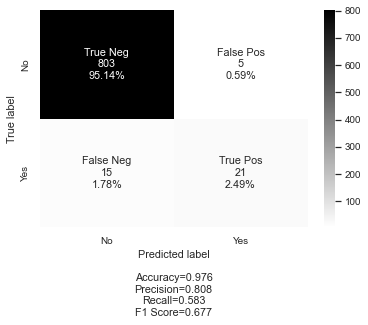

In [178]:
cf_matrix = confusion_matrix(y_test, y_pred1, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [179]:
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred1).apply(lambda x : dict_trans_income[x])
df_dict_GBC = {'Modelo' : ['Gradient Boosting'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_GBC = pd.DataFrame(data = df_dict_GBC)
df_GBC

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Gradient Boosting  0.976303   0.807692  0.583333  0.677419  0.788573

In [180]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

Lg_model = LogisticRegression()

params_Lg = {'penalty' : ['l1', 'l2', 'elasticnet'],
             'solver' : ['lbfgs' , 'sag' , 'newton-cg'],
             'C' : loguniform(1e-5,100)}


Lg_random_search = RandomizedSearchCV(Lg_model,params_Lg)

model_Lg = Pipeline(steps = [('preprocessor', prep),
                            ('model', Lg_random_search)])

In [181]:
model_Lg.fit(x_train,y_train)
y_pred2 = model_Lg.predict(x_test)
model_Lg['model'].best_params_
model_Lg['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_val

0.974494779646115

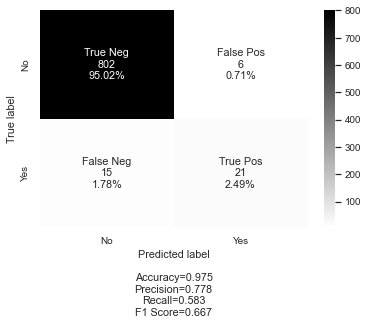

In [182]:
cf_matrix = confusion_matrix(y_test, y_pred2, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [183]:
y_test_bin = pd.Series(y_test).apply(lambda x : dict_trans_income[x])
y_pred_bin = pd.Series(y_pred2).apply(lambda x : dict_trans_income[x])
df_dict_Lg = {'Modelo' : ['Logistic Regression'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred_bin)],
             'F1' : [f1_score(y_test_bin,y_pred_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred_bin)]}
df_Lg = pd.DataFrame(data = df_dict_Lg)
df_Lg

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Logistic Regression  0.975118   0.777778  0.583333  0.666667  0.787954

In [184]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()

params_mlp = {'hidden_layer_sizes' : [100],
              'activation' : [ 'logistic' , 'relu'],
              'solver' : ['lbfgs' , 'adam'],
             'max_iter' : [200]}

random_search_mlp = RandomizedSearchCV(MLP_model,params_mlp)

model_MLP = Pipeline(steps = [('preprocessing' , prep) , 
                             ('model' , random_search_mlp)])

In [185]:
model_MLP.fit(x_train,y_train)
y_pred3 = model_MLP.predict(x_test)
model_MLP['model'].best_params_
model_MLP['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_

0.9739013078360259

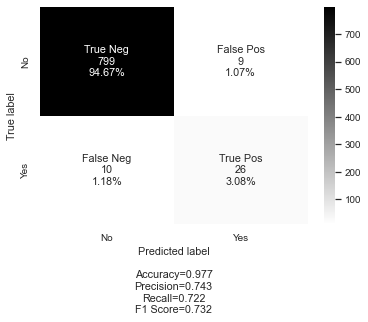

In [186]:
cf_matrix = confusion_matrix(y_test, y_pred3, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [187]:
y_pred3_bin = pd.Series(y_pred3).apply(lambda x : dict_trans_income[x])
df_dict_MLP = {'Modelo' : ['Multi Layer Perceptron'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred3_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred3_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred3_bin)],
             'F1' : [f1_score(y_test_bin,y_pred3_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred3_bin)]}
df_MLP = pd.DataFrame(data = df_dict_MLP)
df_MLP

Modelo  Accuracy  Precision    Recall        F1       AUC
0  Multi Layer Perceptron  0.977488   0.742857  0.722222  0.732394  0.855542

In [188]:
from sklearn.svm import SVC

Vector_model = SVC()

params_Vector = {'C' : loguniform(1e-5,100),
              'kernel' : [ 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'decision_function_shape' : ['ovo', 'ovr'],
             'cache_size' : [200,300,400,500]}

random_search_Vector = RandomizedSearchCV(Vector_model,params_Vector)

model_Vector = Pipeline(steps = [('preprocessing' , prep) , 
                             ('model' , random_search_Vector)])

In [189]:
model_MLP.fit(x_train,y_train)
y_pred4 = model_MLP.predict(x_test)
model_MLP['model'].best_params_
model_MLP['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neural_network\_

0.9739026266622706

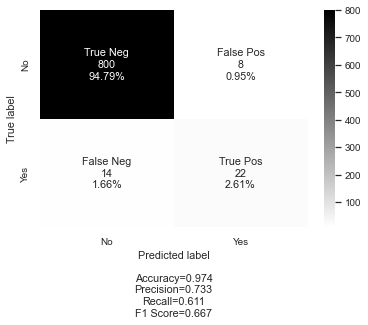

In [190]:
cf_matrix = confusion_matrix(y_test, y_pred4, labels=["No", "Yes"])
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['No', 'Yes']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [191]:
y_pred4_bin = pd.Series(y_pred4).apply(lambda x : dict_trans_income[x])
df_dict_Vector = {'Modelo' : ['Support Vector Machine Classifier'] , 
              'Accuracy' : [accuracy_score(y_test_bin,y_pred4_bin)],
             'Precision' : [precision_score(y_test_bin,y_pred4_bin)],
              'Recall' : [recall_score(y_test_bin,y_pred4_bin)],
             'F1' : [f1_score(y_test_bin,y_pred4_bin)],
             'AUC' : [roc_auc_score(y_test_bin,y_pred4_bin)]}
df_Vector = pd.DataFrame(data = df_dict_Vector)
df_Vector

Modelo  Accuracy  Precision    Recall        F1  \
0  Support Vector Machine Classifier  0.973934   0.733333  0.611111  0.666667   

        AUC  
0  0.800605

In [217]:
df_models = pd.concat([df_rf,df_GBC,df_Lg,df_MLP,df_Vector])
df_models

Modelo  Accuracy  Precision    Recall        F1  \
0                      Random Forest  0.979858   0.827586  0.666667  0.738462   
0                  Gradient Boosting  0.976303   0.807692  0.583333  0.677419   
0                Logistic Regression  0.975118   0.777778  0.583333  0.666667   
0             Multi Layer Perceptron  0.977488   0.742857  0.722222  0.732394   
0  Support Vector Machine Classifier  0.973934   0.733333  0.611111  0.666667   

        AUC  
0  0.830239  
0  0.788573  
0  0.787954  
0  0.855542  
0  0.800605

<p></p>
<font size = 2> The <strong>Recall</strong> statistic in this case is super important, given that the amount of Hall of Famers is small compared to non Hall of Famers we have to prioritize the <strong>Recall</strong> without giving up the <strong>Accuracy</strong>, therefore the best model is the <strong>Multi Layer Perceptron</strong>
<p></p>

In [200]:
model = model_MLP
model = model_MLP.fit(x,y)
model['model'].best_params_
model['model'].best_score_

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\lucas\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79807053        nan        nan 0.77980863        nan 0.78242088
 0.78573589 0.77815408 0.78550623 0.7850337 ]
  warnings.warn(


0.7980705334705098

<p></p>
<font size = 2><strong>2.3 Predicting</strong></font>
<p></p>

In [201]:
df_active.loc[:,'PPG'] = round(df_active.loc[:,'PTS']/df_active.loc[:,'GP'],2)
df_active.loc[:,'APG'] = round(df_active.loc[:,'AST']/df_active.loc[:,'GP'],2)
df_active.loc[:,'RPG'] = round(df_active.loc[:,'REB']/df_active.loc[:,'GP'],2)


df_train_active = df_active.drop(columns = ['GP_RANK','MIN_RANK','FGM_RANK','FGA_RANK','FG_PCT_RANK','FG3M_RANK',
                                      'FG3A_RANK','FG3_PCT_RANK','FTM_RANK','FTA_RANK','FT_PCT_RANK','OREB_RANK',
                                      'DREB_RANK','REB_RANK','AST_RANK','STL_RANK','BLK_RANK','TOV_RANK','PF_RANK',
                                      'PTS_RANK','AST_TOV_RANK','STL_TOV_RANK','EFG_PCT1','TS_PCT1',])
x_active = df_train_active.iloc[:,2:]
x_active = x_active.drop(columns = ['GP','MIN','FGA','FG3A','FTA','OREB','DREB'])
final_pred = model.predict(x_active)
df_final = pd.DataFrame({'HOF' : final_pred})

df_active = df_active.assign(HOF=list(df_final['HOF']))
df_active

C:\Users\lucas\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


PLAYER_ID        PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
1          2544       LeBron James  1409  53707.0  14040  27809   0.505   
13       201142       Kevin Durant   978  35912.0   9126  18311   0.498   
26       201935       James Harden   978  33929.0   7150  16166   0.442   
27       201566  Russell Westbrook  1072  36888.0   8616  19715   0.437   
37       101108         Chris Paul  1189  40977.0   7559  16004   0.472   
...         ...                ...   ...      ...    ...    ...     ...   
4722    1629788         Tyler Hall     1      2.0      0      0   0.000   
4727    1630643           Jay Huff     4     20.0      0      3   0.000   
4728    1630624         Feron Hunt     2      8.0      0      2   0.000   
4735    1631211       Trevor Keels     1      1.0      0      1   0.000   
4781    1631214   Alondes Williams     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB    DREB      REB  \
1     2233.0  6488.0    0.344  8039  10939   0.735  1652.0  8924.0  10576.0   
13    1841.0  4800.0    0.384  6591   7439   0.886   673.0  6235.0   6908.0   
26    2694.0  7436.0    0.362  7239   8423   0.859   762.0  4762.0   5524.0   
27    1201.0  3952.0    0.304  5665   7270   0.779  1749.0  6109.0   7858.0   
37    1602.0  4336.0    0.369  4684   5382   0.870   727.0  4627.0   5354.0   
...      ...     ...      ...   ...    ...     ...     ...     ...      ...   
4722     0.0     0.0    0.000     0      0   0.000     0.0     0.0      0.0   
4727     0.0     2.0    0.000     0      0   0.000     1.0     3.0      4.0   
4728     0.0     0.0    0.000     0      0   0.000     1.0     0.0      1.0   
4735     0.0     1.0    0.000     0      0   0.000     0.0     1.0      1.0   
4781     0.0     0.0    0.000     0      0   0.000     0.0     1.0      1.0   

        AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
1     10351  2176.0  1065.0  4922.0  2585  38352    2.103    0.442    0.545   
13     4239  1053.0  1095.0  3100.0  1893  26684    1.367    0.340    0.549   
26     6790  1492.0   531.0  3665.0  2533  24233    1.853    0.407    0.526   
27     8994  1750.0   335.0  4366.0  2806  24098    2.060    0.401    0.467   
37    11271  2499.0   186.0  2843.0  2880  21404    3.964    0.879    0.522   
...     ...     ...     ...     ...   ...    ...      ...      ...      ...   
4722      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4727      1     1.0     1.0     1.0     1      0    1.000    1.000    0.000   
4728      1     1.0     0.0     1.0     1      0    1.000    1.000    0.000   
4735      0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4781      0     0.0     0.0     2.0     1      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
1      0.588       10         3         2         2          490          9   
13     0.618      167        67        22        29          625         20   
26     0.610      167        94        70        46         1813          3   
27     0.526       98        58        27        19         1986         90   
37     0.583       49        31        50        49         1031         34   
...      ...      ...       ...       ...       ...          ...        ...   
4722   0.000     4707      4413      4663      4751         4663       2575   
4727   0.000     4479      4201      4663      4620         4663       2575   
4728   0.000     4624      4335      4663      4671         4663       2575   
4735   0.000     4707      4424      4663      4704         4663       2575   
4781   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
1             4           835         4         5         2069        175   
13           23           299        14        27          195        636   
26            2           5

In [202]:
df_allTime_final = pd.concat([df_retired,df_active],ignore_index = True)
df_allTime_final

PLAYER_ID          PLAYER_NAME    GP      MIN    FGM    FGA  FG_PCT  \
0         76003  Kareem Abdul-Jabbar  1560  57446.0  15837  28307   0.559   
1           252          Karl Malone  1476  54852.0  13528  26210   0.516   
2           977          Kobe Bryant  1346  48643.0  11719  26200   0.447   
3           893       Michael Jordan  1072  41010.0  12192  24537   0.497   
4          1717        Dirk Nowitzki  1522  51367.0  11169  23734   0.471   
...         ...                  ...   ...      ...    ...    ...     ...   
4778    1629788           Tyler Hall     1      2.0      0      0   0.000   
4779    1630643             Jay Huff     4     20.0      0      3   0.000   
4780    1630624           Feron Hunt     2      8.0      0      2   0.000   
4781    1631211         Trevor Keels     1      1.0      0      1   0.000   
4782    1631214     Alondes Williams     1      5.0      0      0   0.000   

        FG3M    FG3A  FG3_PCT   FTM    FTA  FT_PCT    OREB     DREB      REB  \
0        1.0    18.0    0.056  6712   9304   0.721  2975.0   9394.0  17440.0   
1       85.0   310.0    0.274  9787  13188   0.742  3562.0  11406.0  14968.0   
2     1827.0  5546.0    0.329  8378  10011   0.837  1499.0   5548.0   7047.0   
3      581.0  1778.0    0.327  7327   8772   0.835  1668.0   5004.0   6672.0   
4     1982.0  5210.0    0.380  7240   8239   0.879  1468.0  10021.0  11489.0   
...      ...     ...      ...   ...    ...     ...     ...      ...      ...   
4778     0.0     0.0    0.000     0      0   0.000     0.0      0.0      0.0   
4779     0.0     2.0    0.000     0      0   0.000     1.0      3.0      4.0   
4780     0.0     0.0    0.000     0      0   0.000     1.0      0.0      1.0   
4781     0.0     1.0    0.000     0      0   0.000     0.0      1.0      1.0   
4782     0.0     0.0    0.000     0      0   0.000     0.0      1.0      1.0   

       AST     STL     BLK     TOV    PF    PTS  AST_TOV  STL_TOV  EFG_PCT  \
0     5660  1160.0  3189.0  2527.0  4657  38387    1.156    0.302    0.559   
1     5248  2085.0  1145.0  4524.0  4578  36928    1.160    0.461    0.518   
2     6306  1944.0   640.0  4010.0  3353  33643    1.573    0.485    0.482   
3     5633  2514.0   893.0  2924.0  2783  32292    1.926    0.860    0.509   
4     3651  1210.0  1281.0  2494.0  3601  31560    1.464    0.485    0.512   
...    ...     ...     ...     ...   ...    ...      ...      ...      ...   
4778     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4779     1     1.0     1.0     1.0     1      0    1.000    1.000    0.000   
4780     1     1.0     0.0     1.0     1      0    1.000    1.000    0.000   
4781     0     0.0     0.0     0.0     0      0    0.000    0.000    0.000   
4782     0     0.0     0.0     2.0     1      0    0.000    0.000    0.000   

      TS_PCT  GP_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  \
0      0.592        2         1         1         1          168       2318   
1      0.577        6         2         3         3          377        991   
2      0.550       15         8         6         4         1669         22   
3      0.569       98        29         5         5          644        330   
4      0.577        4         4         8         8         1072         15   
...      ...      ...       ...       ...       ...          ...        ...   
4778   0.000     4707      4413      4663      4751         4663       2575   
4779   0.000     4479      4201      4663      4620         4663       2575   
4780   0.000     4624      4335      4663      4671         4663       2575   
4781   0.000     4707      4424      4663      4704         4663       2575   
4782   0.000     4707      4370      4663      4751         4663       2575   

      FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  \
0          2049          2552        12         8         2252         32   
1           948          1680         1         1         1938         13   
2  

In [203]:
df_allTime_final.to_csv('NBA_allTime_PredictHoF.csv')

<p></p>
<font size = 3><strong>Data Analysis</strong></font>
<p></p>

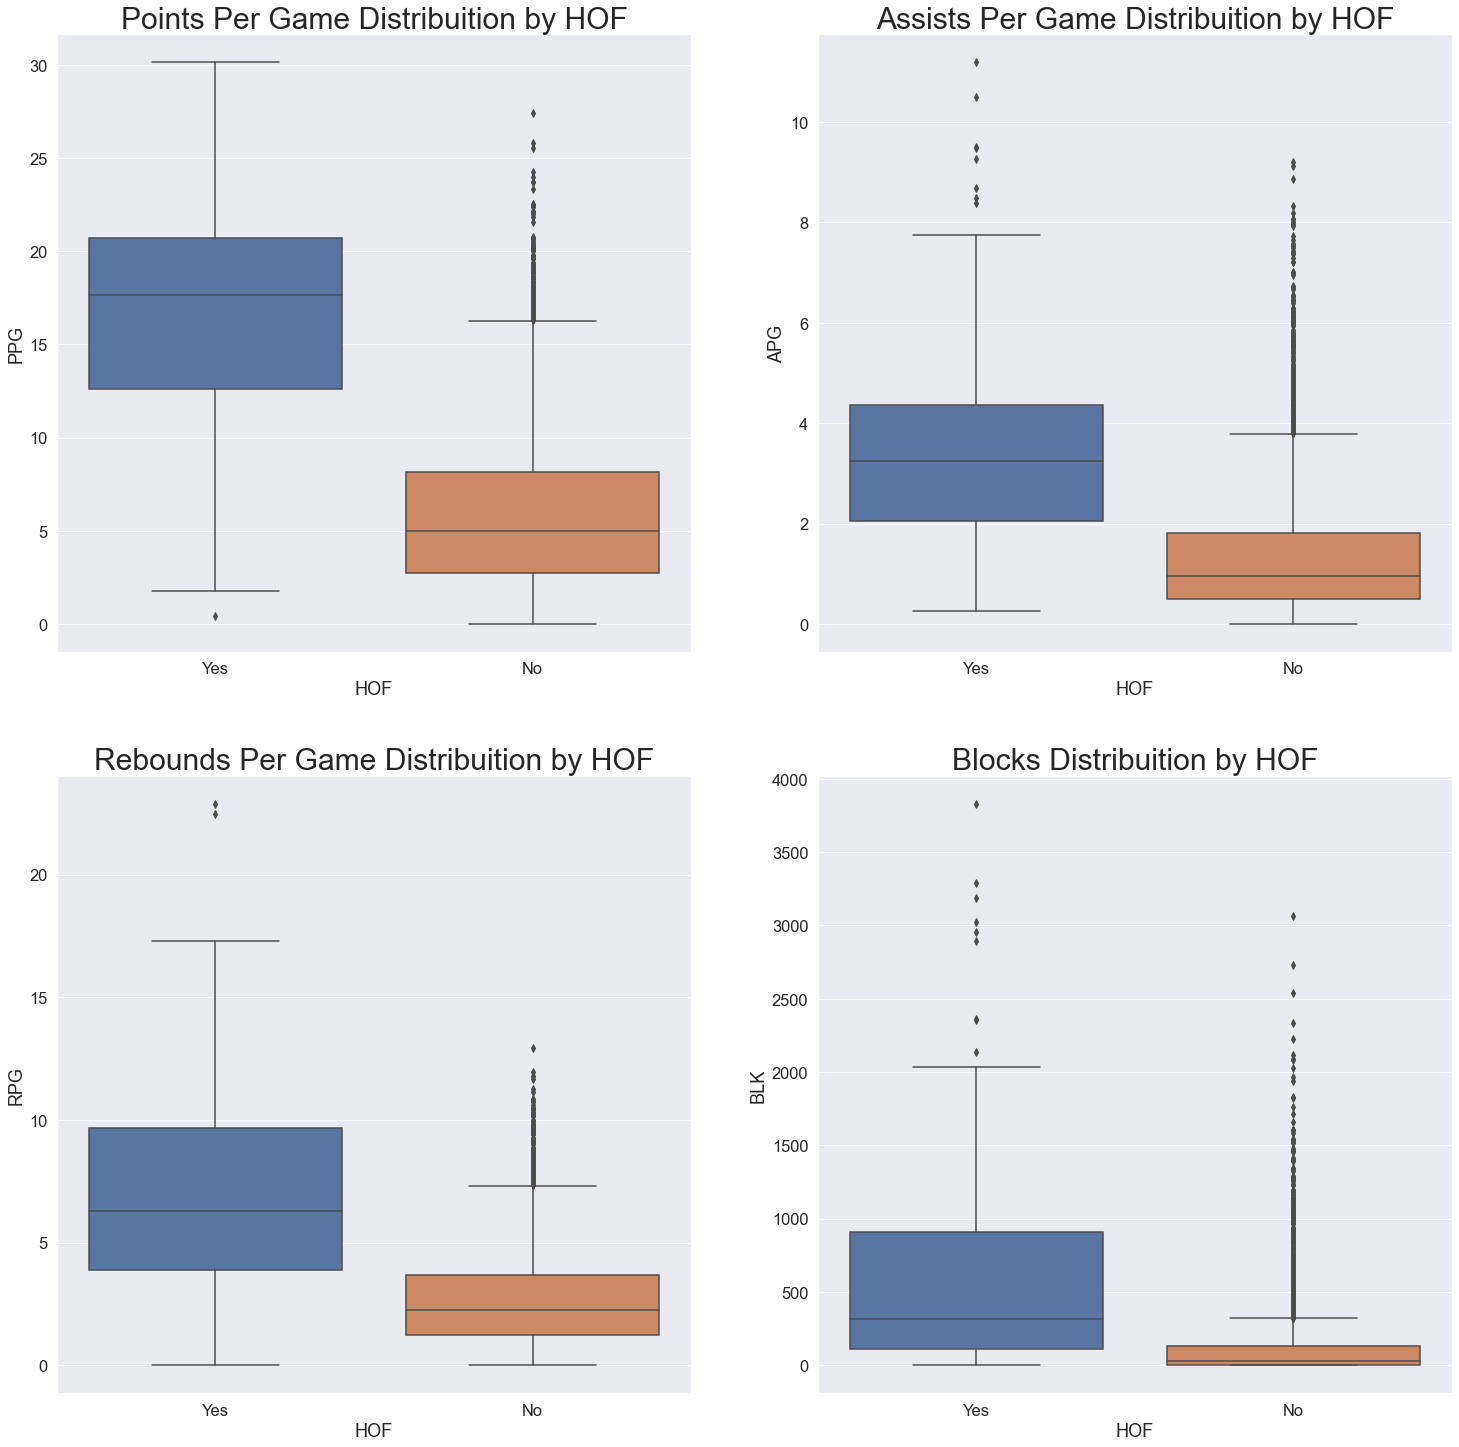

In [254]:
fig,axs = plt.subplots(2, 2,figsize = (25,25))
sns.set(font_scale = 1.5)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'PPG', ax = axs[0,0])
axs[0,0].set_title('Points Per Game Distribuition by HOF', fontsize = 30)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'APG', ax = axs[0,1])
axs[0,1].set_title('Assists Per Game Distribuition by HOF', fontsize = 30)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'RPG', ax = axs[1,0])
axs[1,0].set_title('Rebounds Per Game Distribuition by HOF', fontsize = 30)

sns.boxplot(data = df_allTime_final, x = 'HOF' , y = 'BLK', ax = axs[1,1])
axs[1,1].set_title('Blocks Distribuition by HOF', fontsize = 30)

plt.show()

<font size = 3> One thing that we can notice is that there are some missclassifications when some players classified as <em> Hall of Famers</em> average almost 5 points per game and some <em> normal </em> palyers have a high average.</font>

<font size = 3><p> But overall <strong> Hall of Famers</strong> follow what we expect, have greater statistics than <em> normal </em> players.</p></font>